In [1]:
require(PRROC)

Loading required package: PRROC



In [3]:
DATADUMP='/ahg/regevdata/projects/bn10_cancer_variants/bn10_oana_2018-06-22/results/2018-06-22/results/2020-02-14/2020-09-15_Tables/'
df=read.table(paste(DATADUMP,'/pc3_auprc.csv',sep=''),
              sep=',',header=TRUE)
df

Variant,pc3,gila_d7
<fct>,<dbl>,<dbl>
M111L,-1.8142649,0
T127T,-1.6525360,0
V112I,-1.6890078,0
R149K,-1.7601086,0
S17S,-1.8998106,0
T74T,-1.4657011,0
I163S,-1.8025906,0
G75A,-1.9547555,0
K147N,-1.1569457,0


In [4]:
colnames(df)=c('rowname','score','label')

In [5]:
get_roc_pr_from_scores=function(scores){
    myroc=roc.curve(scores.class0=scores[,'score'], weights.class0=scores[,'label'],curve=TRUE)
    mypr=pr.curve(scores.class0=scores[,'score'], weights.class0=scores[,'label'],curve=TRUE)
    toreturn=list()
    toreturn[['roc']]=myroc[['auc']]
    toreturn[['pr']]=mypr[['auc.integral']]
    toreturn[['pr_plot']]=mypr
    return(toreturn)
}

res=get_roc_pr_from_scores(df)

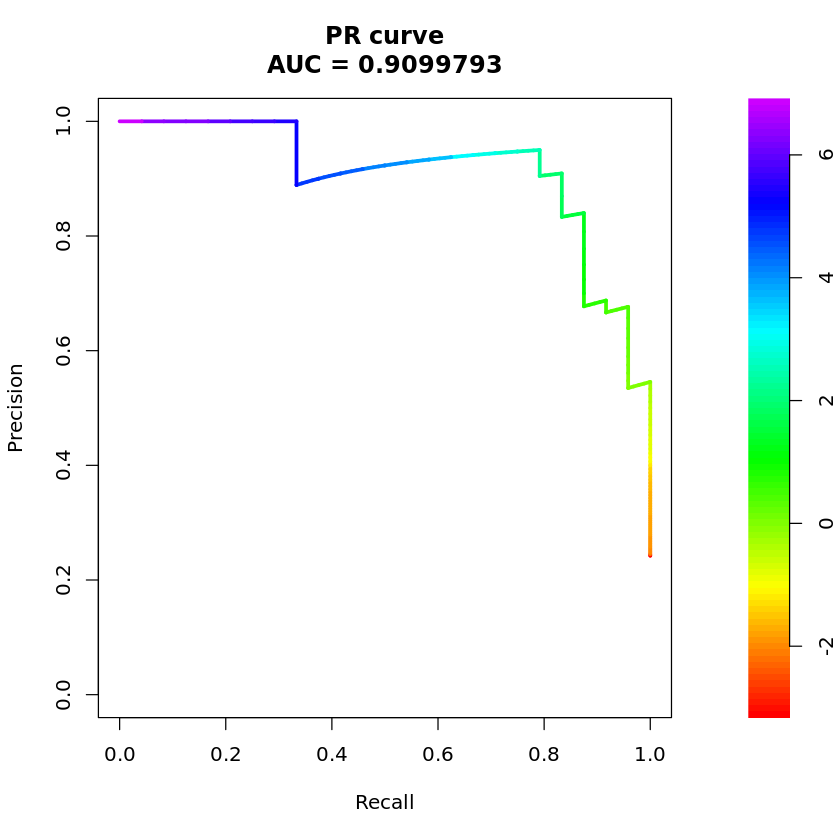

In [6]:
plot(res[['pr_plot']])